In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as sc
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score, mean_squared_error
import math

In [2]:
df = pd.read_csv('car-mpg_students.csv')
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [3]:
dups = df.duplicated()
dups.sum()

0

In [4]:
df = df.drop('car_name', axis = 1)

In [5]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0


In [6]:
df.isna().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_type    0
dtype: int64

<AxesSubplot:>

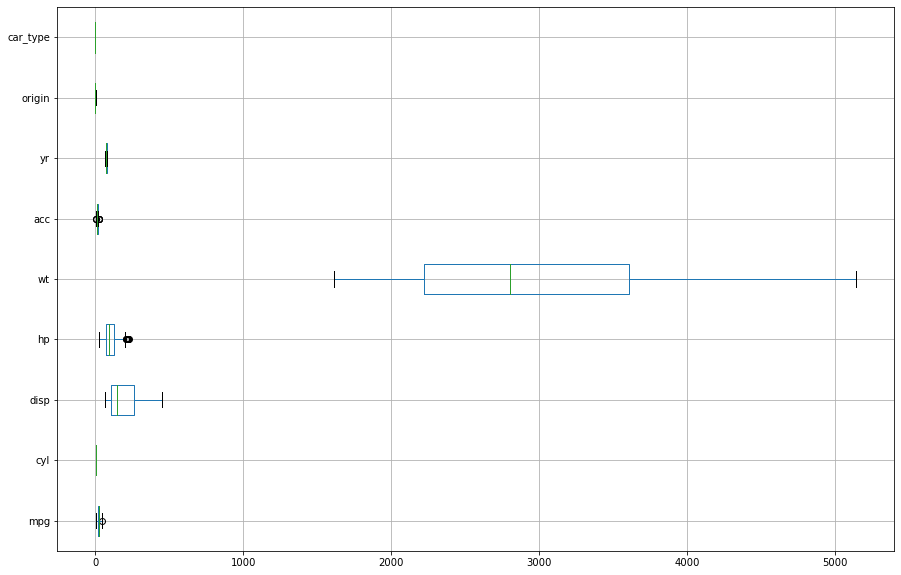

In [7]:
plt.figure(figsize = (15,10))
df.boxplot(vert = 0)

In [8]:
def outlier_treatment (data, col, method = 'Quartile', strategy = 'Median'):
    coldata = data[col]
    
    if method == 'Quartile':
        median = coldata.median()
        Q1 = coldata.quantile(0.25)
        Q3 = coldata.quantile(0.75)
        IQR = Q3-Q1
        Upperlimit = Q3 + (1.5*IQR)
        Lowerlimit = Q1 - (1.5*IQR)
        
    
    elif method == 'Std':
        colmean = coldata.mean()
        colstd = coldata.std()
        cutoff = colstd*2  #It covers the approx 95 % of data
        Upperlimit = colmean + cutoff
        Lowerlimit = colmean - cutoff
        
    else:
        print('Invalid method')
        
    if strategy == 'Mean':
        data.loc[(coldata < Lowerlimit) | (coldata > Upperlimit), col] = colmean
    elif strategy == 'Median':
        data.loc[(coldata < Lowerlimit) | (coldata > Upperlimit), col] = median
    return data

In [9]:
def odt_plots(df,col):
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (15,4))
    #Boxplot with outliers
    kwargs = {'fontsize':10, 'color':'black'}  #keyword arguments
    sns.boxplot(df[col], ax = ax1, color = 'b')
    ax1.set_title('Boxplot for '+col, **kwargs) #** to pass inbuilt fns.
    ax1.set_xlabel('Values',**kwargs)
    ax1.set_ylabel('Boxplot distribution',**kwargs)
    
    #Histogram with outliers
    sns.distplot(df[col], ax = ax2, color = 'r',fit = sc.norm)
    ax2.set_title('Histogram for '+col, **kwargs) #** to pass inbuilt fns.
    ax2.set_xlabel('Values',**kwargs)
    ax2.set_ylabel('Histogram',**kwargs)
    
    #Histogram without outliers
    y = outlier_treatment(df, col)
    sns.distplot(y[col], ax = ax3, color = 'y')
    ax3.set_title('Histogram for '+col, **kwargs) #** to pass inbuilt fns.
    ax3.set_xlabel('Values',**kwargs)
    ax3.set_ylabel('Histogram',**kwargs)

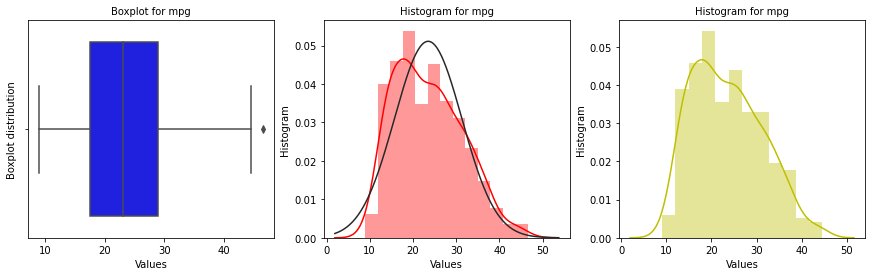

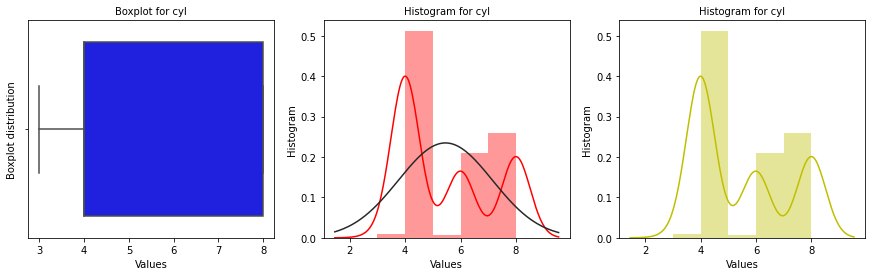

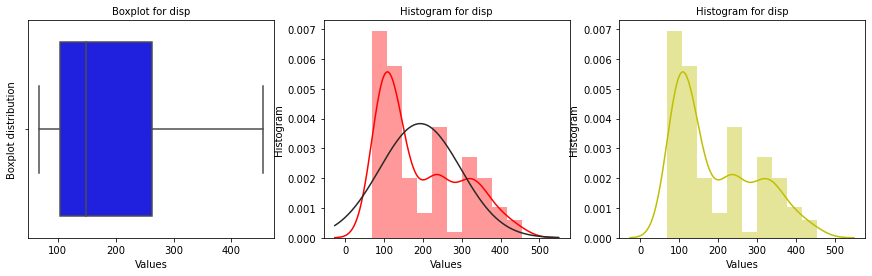

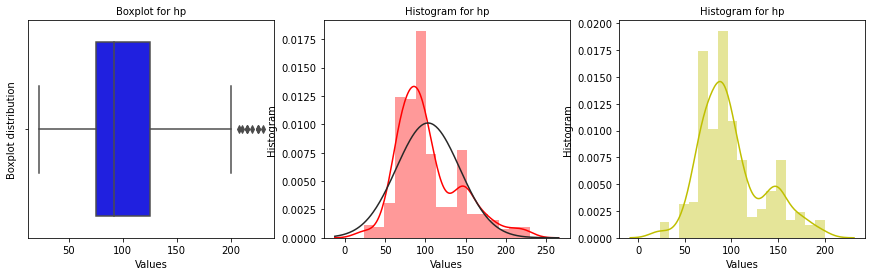

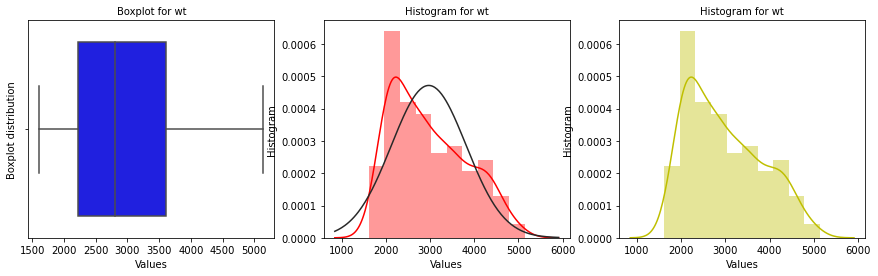

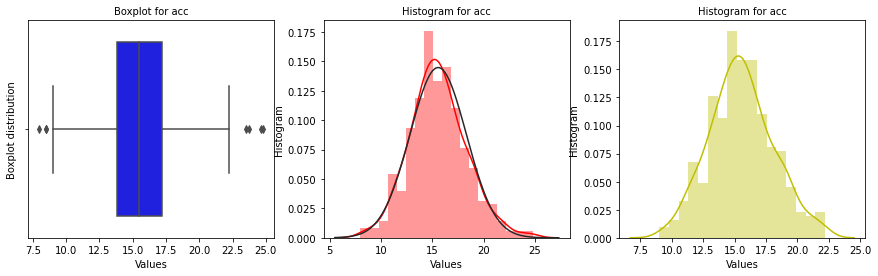

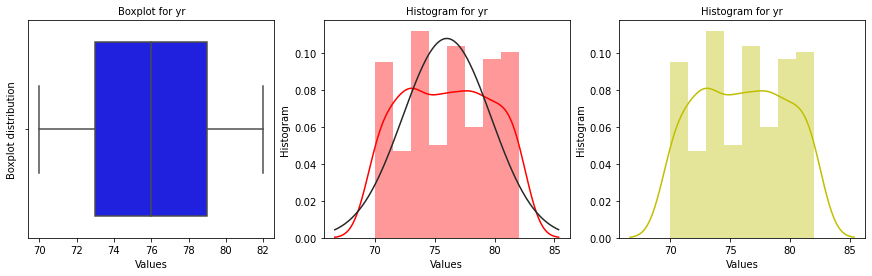

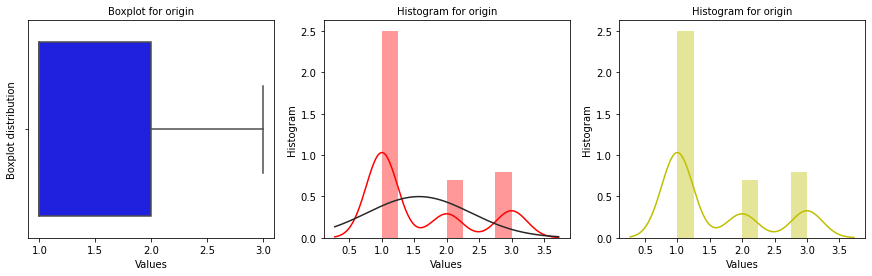

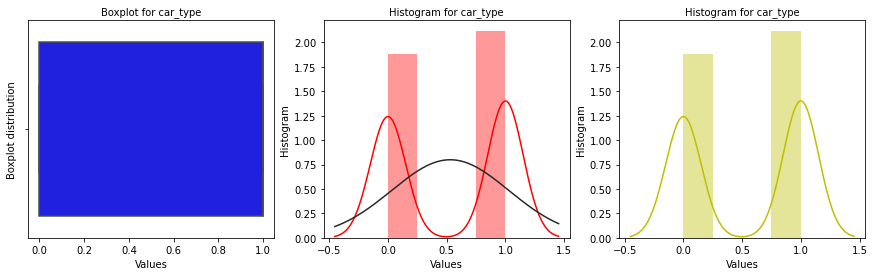

In [10]:
for col in df.columns:
    odt_plots(df,col)

<AxesSubplot:>

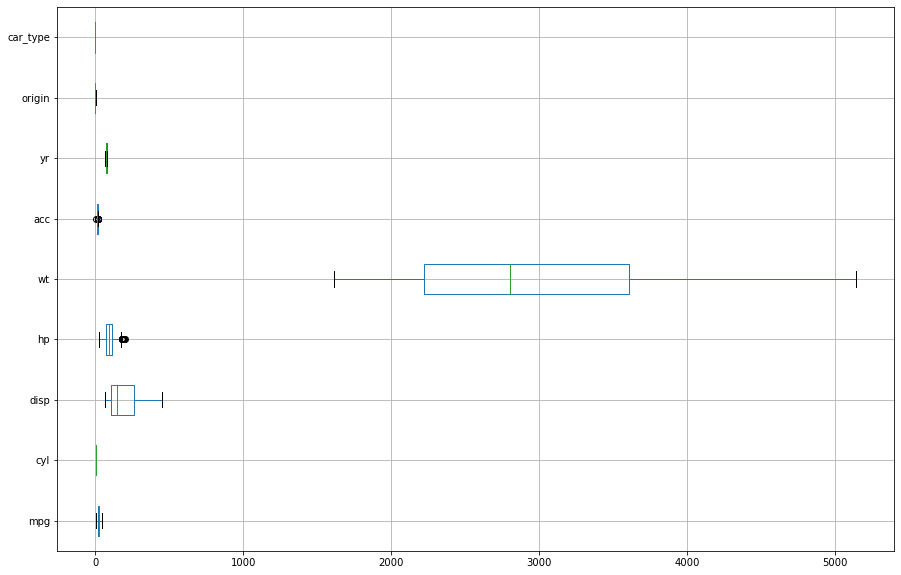

In [11]:
plt.figure(figsize = (15,10))
df.boxplot(vert = 0)

In [12]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504.0,12.0,70,1,0
1,15.0,8,350.0,165,3693.0,11.5,70,1,0
2,18.0,8,318.0,150,3436.0,11.0,70,1,0
3,16.0,8,304.0,150,3433.0,12.0,70,1,0
4,17.0,8,302.0,140,3449.0,10.5,70,1,0


In [13]:
x = df.drop('mpg', axis=1)

In [14]:
x.head()

,cyl,disp,hp,wt,acc,yr,origin,car_type
0,8,307.0,130,3504.0,12.0,70,1,0
1,8,350.0,165,3693.0,11.5,70,1,0
2,8,318.0,150,3436.0,11.0,70,1,0
3,8,304.0,150,3433.0,12.0,70,1,0
4,8,302.0,140,3449.0,10.5,70,1,0


In [15]:
y = df['mpg']

In [16]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state= 20)

In [19]:
regression_model = LinearRegression()
regression_model.fit(x_train,y_train)
intercept = regression_model.intercept_

In [20]:
print(intercept)

-22.378902192515508


In [21]:
regression_coefficient = regression_model.coef_

In [22]:
for i,col in enumerate(x_train.columns):
    print('coefficient for {} is {}'.format(col,regression_coefficient[i]))

coefficient for cyl is 2.112813102910901
coefficient for disp is 0.0029950258749595537
coefficient for hp is -0.03839374365614203
coefficient for wt is -0.006195426900218995
coefficient for acc is 0.053479811259761124
coefficient for yr is 0.6657370393685147
coefficient for origin is 0.7397193626309054
coefficient for car_type is 6.184398122884091


In [23]:
print('training dataset_ 70_30 :{0}, testing dataset_70_30: {1}'.format(regression_model.score(x_train,y_train),regression_model.score(x_test,y_test)))

training dataset_ 70_30 :0.8383645350660403, testing dataset_70_30: 0.8330928481923128


In [25]:
#Evaluation
pred = regression_model.predict(x_test)

In [26]:
pred

array([14.9455653 , 18.81179172, 33.54892435, 18.80530082, 19.8029331 ,
       15.77394195, 19.53013085, 14.47042729, 31.21919383, 20.33411922,
       31.20577309, 21.1111378 , 12.90064439, 22.22511763, 15.68321377,
       23.69601779, 25.41786199, 29.35737063, 30.77823475, 12.71470705,
       34.2771274 , 14.74879703, 34.96113069, 11.15030482, 13.764758  ,
       18.462854  , 17.98838097, 19.4692298 , 27.82879448, 18.94315215,
       30.08933583, 26.83305934, 23.415465  , 17.19990899, 18.50170535,
       19.81248568, 30.04438468, 33.6218216 , 33.44043248, 18.35966361,
       28.32004444, 34.62013399, 30.69329083, 25.93265748, 35.92326368,
       31.7466619 , 25.08446235, 30.67306375, 35.15570954, 23.87517602,
       11.60735756, 28.71969292, 17.59114729, 25.9012864 , 25.09128129,
       12.51175843, 26.11422577, 36.29665271, 27.30240875, 28.71390087,
       32.01261699, 33.38178633, 30.28158134, 12.28644672, 36.44121113,
       28.9809732 , 27.51726871, 26.09144567, 22.77626208, 24.26

In [28]:
r2_score(y_test,pred)

0.8330928481923128

In [34]:
k = mean_squared_error(y_test,pred)

In [36]:
rmse = math.sqrt(k)

In [37]:
rmse

3.329603651228247